# Multiple News Phase diagrams

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [2]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.abspath(''))))

In [3]:
from classes.agent import AgentState
from classes.news import News
from classes.utils import construct_world

In [4]:
def create_news(sensations, decay_parameters):
    news = {}
    for name, (s, c) in enumerate(zip(sensations, decay_parameters)):
        news[name] = News(name, sensation=s, decay_parameter=c)
        
    return news

def create_sensation_map(sensations_1, sensations_2, num_agents=1000, num_samples=10, initial_per_news=5):
    agent_names = list(range(num_agents))
    thresholds = np.random.random(num_agents)
    independences = np.random.random(num_agents)
    
    df = pd.DataFrame(columns=['sensation news 1', 'sensation news 2', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')  
    for s_1 in sensations_1:
        for s_2 in sensations_2:
            samples = []
            for _ in range(num_samples):
                news = create_news([s_1, s_2], [0.0, 0.0])
                world = construct_world(agent_names, thresholds, independences, news)

                initial_agent_names = np.random.choice(agent_names, len(news.keys()) * initial_per_news, replace=False)
                for news_idx, name_news in enumerate(news.keys()):
                    for i in range(initial_per_news):
                        world.agents[initial_agent_names[news_idx*initial_per_news + i]].states[name_news] = AgentState.ACTIVE
                
                number_active, _, _ = world.full_dynamics()
                samples.append((number_active[0] - number_active[1]))
            
            df_active = pd.DataFrame([[s_1, s_2, np.mean(samples) / num_agents]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
    return df.astype(float).pivot('sensation news 2', 'sensation news 1', 'number active')

In [5]:
sensation_1 = np.linspace(0.0, 1.0, 11)
sensation_2 = np.linspace(0.0, 1.0, 11)

sensation_map = create_sensation_map(sensation_1, sensation_2)

Starting simulation with 1000 agents (this may take some time...)
Simulation completed!!!


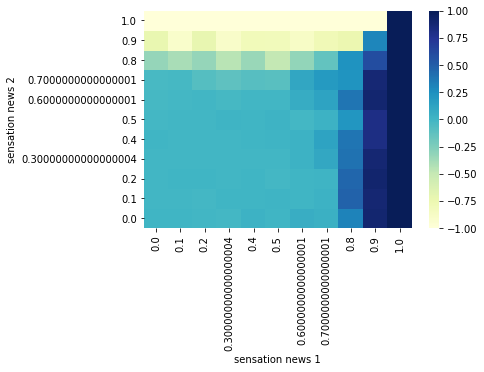

In [6]:
ax = sns.heatmap(sensation_map, cmap='YlGnBu', vmin=-1.0, vmax=1.0)
ax.invert_yaxis()